In [3]:
from PIL import Image  
import numpy as np  
import sdf2circle as sdf
import evol_cv as chanvese

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from skimage import measure,draw 

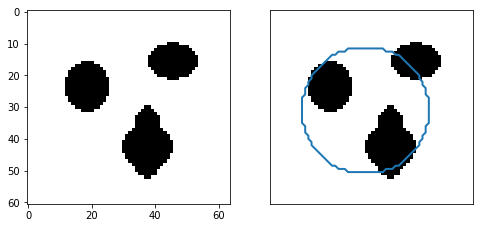

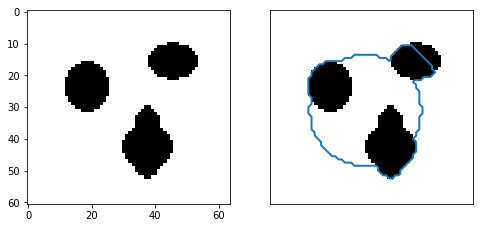

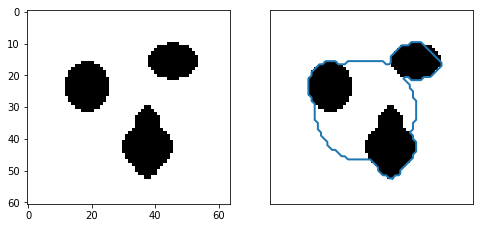

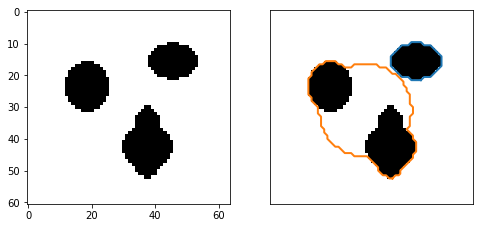

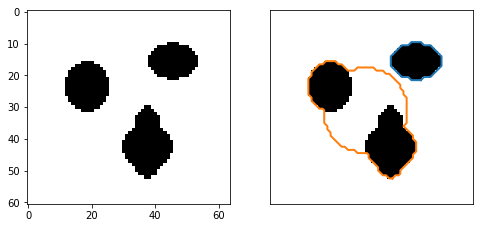

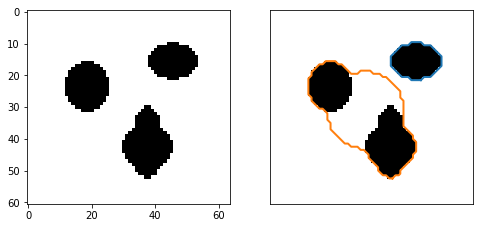

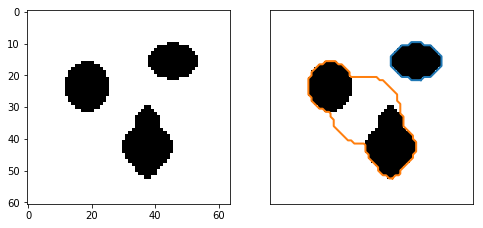

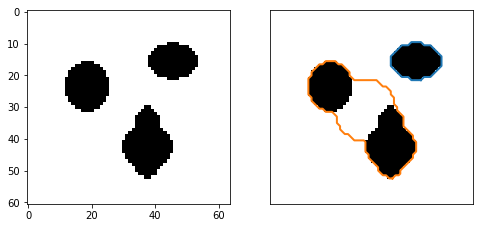

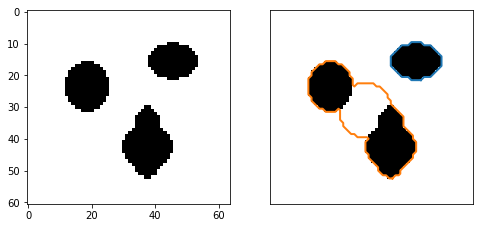

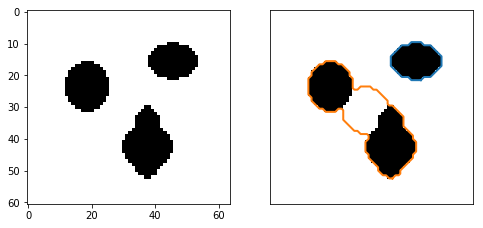

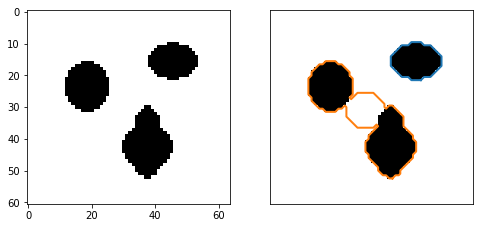

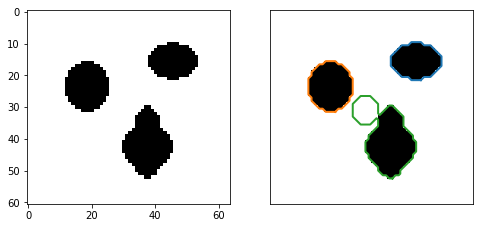

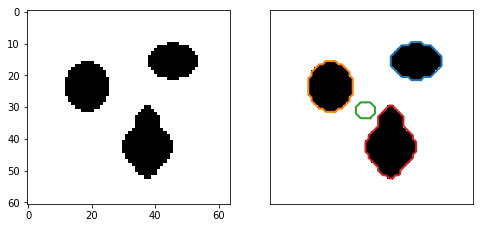

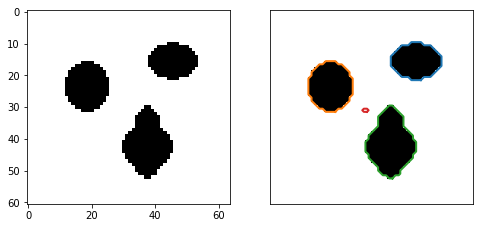

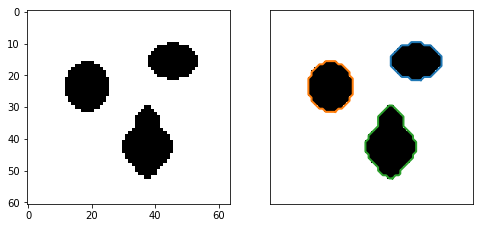

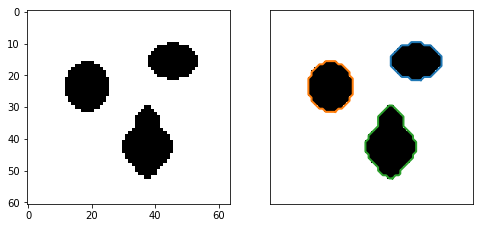

In [11]:
im= Image.open("three.bmp")#读取图像
#r,g,b=im.split()
gray=im.convert('L')#灰度图
img=np.array(gray)#转为数组

Img=img.astype(np.float)#转为浮点型

#默认参数设置
numIter = 15
timestep = 0.1
lambda_1=1
lambda_2=1
#h = 1
epsilon=1;
nu = 0.001*255*255 # tune this parameter for different images

#初始轮廓设置
[nrow, ncol] = Img.shape
ic=nrow/2#中心位置
jc=ncol/2#
r=20#半径大小


initialLSF = sdf.sdf2circle(nrow,ncol,ic,jc,r)
i=initialLSF<0
contours = measure.find_contours(i, 0.5)
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(8,8))
ax0.imshow(img,plt.cm.gray)
ax1.imshow(img,plt.cm.gray)

for n, contour in enumerate(contours):
    ax1.plot(contour[:, 1], contour[:, 0], linewidth=2)
    ax1.axis('image')
    ax1.set_xticks([])
    ax1.set_yticks([])
    plt.show()

u = initialLSF

for k in range(numIter):
    u=chanvese.evol_cv(Img, u, nu, lambda_1, lambda_2, timestep, epsilon)
    
    i=u<0
    contours = measure.find_contours(i, 0.5)
    fig, (ax0,ax1) = plt.subplots(1,2,figsize=(8,8))
    #fig, (ax0,ax1) = plt.subplots(1,2,figsize=(8,8))
    ax0.imshow(img,plt.cm.gray)
    ax1.imshow(img,plt.cm.gray)
    for n, contour in enumerate(contours):
        ax1.plot(contour[:, 1], contour[:, 0], linewidth=2)
        ax1.axis('image')
        ax1.set_xticks([])
        ax1.set_yticks([])
    plt.show()



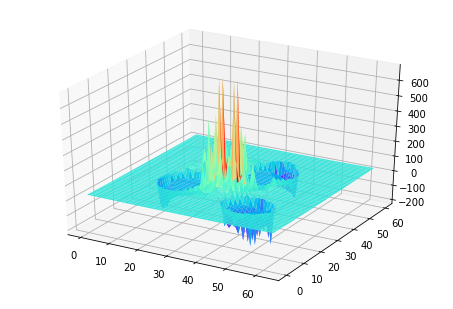

In [10]:
from mpl_toolkits.mplot3d import Axes3D

figure = plt.figure()
ax = Axes3D(figure)
[x,y]=u.shape

X = np.arange(0, y, 1)
Y = np.arange(0, x, 1)
X, Y = np.meshgrid(X, Y)

ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap='rainbow')

plt.show()
#水平集函数结果